**Sobre a Empresa**

Bellabeat é uma fabricante de produtos de alta tecnologia voltados a saúde. É uma pequena empresa de sucesso, mas tem potencial para se tornar uma grande força no mercado global de smart devices.

**1. ASK**

Resumo da Business Task:
Identificar trends em como usuários utilizam outros devices voltados a saúde para obter insights que possam ser aplicados em produtos e campanhas de marketing da Bellabeat.

**2. PREPARE**

- Conjunto de dados gerado pelos respondentes de uma pesquisa distribuída via Amazon Mechanical Turk entre 03/12/2016 e 05/12/2016. Informações sobre dados de rastreadores pessoais de trinta usuários do Fitbit; os dados incluem dados de atividade física, frequência cardíaca e monitoramento do sono por minuto.
- Dados de código aberto disponivéis no Kaggle via Morbius.
- Estão em formato longo.
- Instalar os pacotes "tidyverse", "janitor", "lubridate"

**3. PROCESS**

Após instalação dos pacotes necessáris iremos carregar as bibliotecas.

In [1]:
library(tidyverse)
library(janitor)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Logo após vamos importar os datasets

In [2]:
activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensityhr <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleepday <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 22099 Columns: 3


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 22099 Columns: 4


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 413 Columns: 5


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Com os datasets importados podemos começar a explorar os dados; podemos começar com uma breve visualização:

In [3]:
head(activity); str(activity)
head(calories); str(calories)
head(intensityhr); str(intensityhr)
head(sleepday); str(sleepday)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


spc_tbl_ [22,099 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id              : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   TotalIntensity = col_double(),
  ..   AverageIntensity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Podemos começar a fazer a limpeza e formatação dos dados.
Vamos realizar a contagem do numero de usuários por data frame.

In [4]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensityhr$Id)
n_distinct(sleepday$Id)

[1] 33

[1] 33

[1] 33

[1] 24

Após a contagem vamos remover quaisquer duplicatas e N/A.

In [5]:
activity   <- activity %>% distinct() %>% drop_na()
calories   <- calories %>% distinct() %>% drop_na()
intensityhr <- intensityhr %>% distinct() %>% drop_na()
sleepday   <- sleepday %>% distinct() %>% drop_na()


Vamos então padronizar o nome de nossas colunas, buscando remover espaços e deixar tudo em lower case.

In [6]:
activity <- activity %>% clean_names()
calories   <- calories %>% clean_names()
intensityhr <- intensityhr %>% clean_names()
sleepday   <- sleepday %>% clean_names()

Com os nomes das colunas padronizadas vamos formatar os dados referentes a data que estão no formato *chr* para date-time. 

In [7]:
calories$activity_hour   <- as.POSIXct(calories$activity_hour, format = "%m/%d/%Y %I:%M:%S %p")
intensityhr$activity_hour <- as.POSIXct(intensityhr$activity_hour, format = "%m/%d/%Y %I:%M:%S %p")
activity$activity_date   <- as.POSIXct(activity$activity_date, format = "%m/%d/%Y")
sleepday$sleep_day       <- as.POSIXct(sleepday$sleep_day, format = "%m/%d/%Y")

Antes de começar a analizar vamos realizar o merge das tebelas activity e sleepday, pelo id dos usuários:

In [8]:
activity_sleep <- merge(activity, sleepday, by = "id")

**4. **Analyze****
   
A primeira ideia para gerar insight vem de tentar descobrir em quais dias da semana os usuários são mais ativos; pra isso vou usar como métrica a média de passos dados medido pelo app por dias da semana. Para isso vou categorizar os dias da semana por nome, e depois gerar o gráfico:

In [9]:
activity <- activity %>%
  mutate(weekday = weekdays(as.Date(activity_date))) %>%
  mutate(weekday = factor(weekday,
                          levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")))

avg_steps_by_day <- activity %>%
  group_by(weekday) %>%
  summarise(avg_steps = mean(total_steps, na.rm = TRUE))

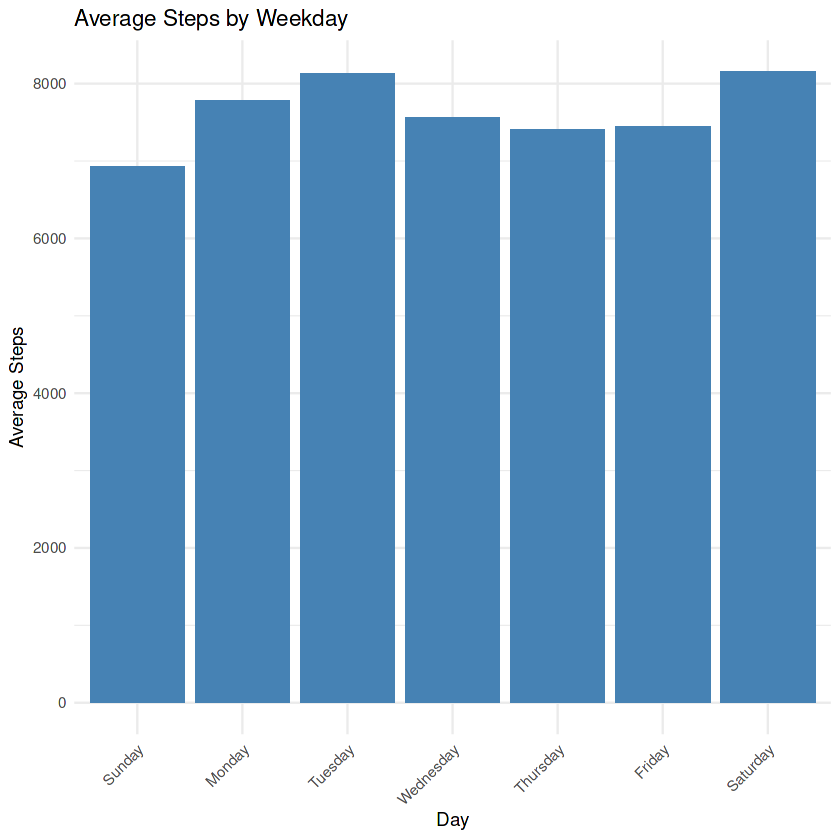

In [10]:
ggplot(avg_steps_by_day, aes(x = weekday, y = avg_steps)) +
  geom_col(fill = "steelblue") +
  labs(title = "Average Steps by Weekday", x = "Day", y = "Average Steps") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Notamos que o ponto baixo de atividade é o domingo; ocorre um aumento de segunda para terça e a partir dai esse número vai caindo durante o resto da semana, até atingir um pico no sábado. O que nos leva a pensar qual a causa desse aumento repentino em meio a queda.
A principal hipótese que que tenho é que geralmente no sábado temos mais tempo livre para realizar tarefas e sair, praticar algum lazer. Vou tentar comprovar isso plotando um gráfico com a média de minutos em atividades intensas e leves por dias da semana

In [11]:
activity_type_long <- activity %>%
  group_by(weekday) %>%
  summarise(
    very_active = mean(very_active_minutes, na.rm = TRUE),
    lightly_active = mean(lightly_active_minutes, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = c("very_active", "lightly_active"),
               names_to = "type", values_to = "minutes")

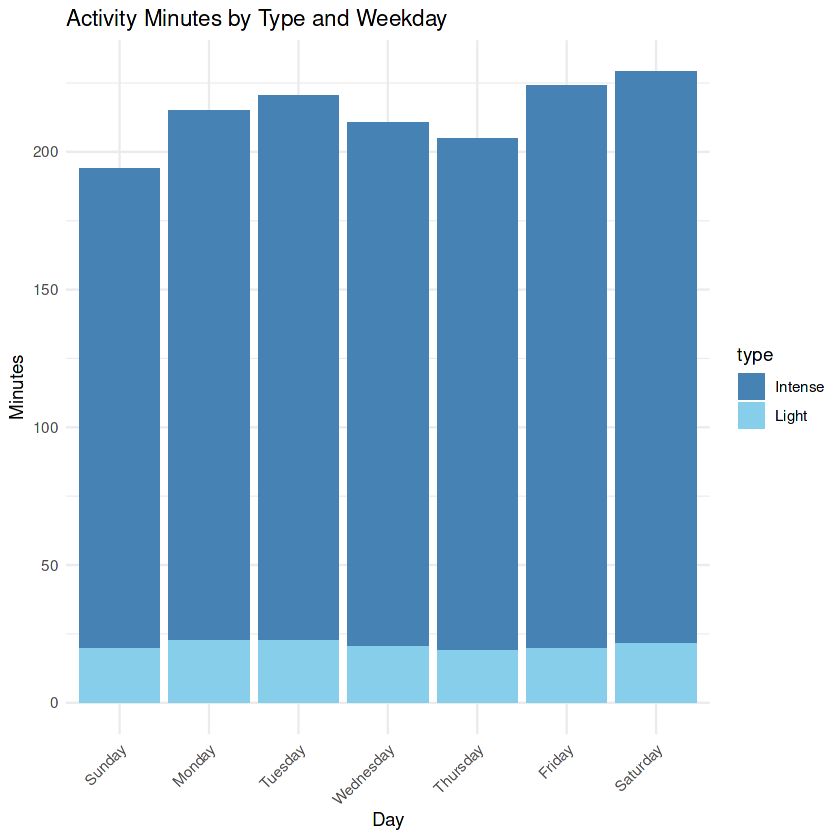

In [12]:
ggplot(activity_type_long, aes(x = weekday, y = minutes, fill = type)) +
  geom_col(position = "stack") +
  scale_fill_manual(values = c("steelblue", "skyblue"),
                    labels = c("Intense", "Light")) +
  labs(title = "Activity Minutes by Type and Weekday",
       x = "Day", y = "Minutes") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

E o gráfico comprova a hipótese! No sabádo os usuários tendem a realizar mais atividade leves do que nos outros dias da semana. 

Outra trend que pretendo abordar é sobre as calorias que são gastas ao longo da semana, e como as atividades intensas podem ajudar os usuários a queimarem calorias.
Para melhor visualização vou agrupar a média das calorias e organiza-las por dias da semana:

In [13]:
calories_day <- activity %>%
  group_by(weekday) %>%
  summarise(avg_calories = mean(calories, na.rm = TRUE))

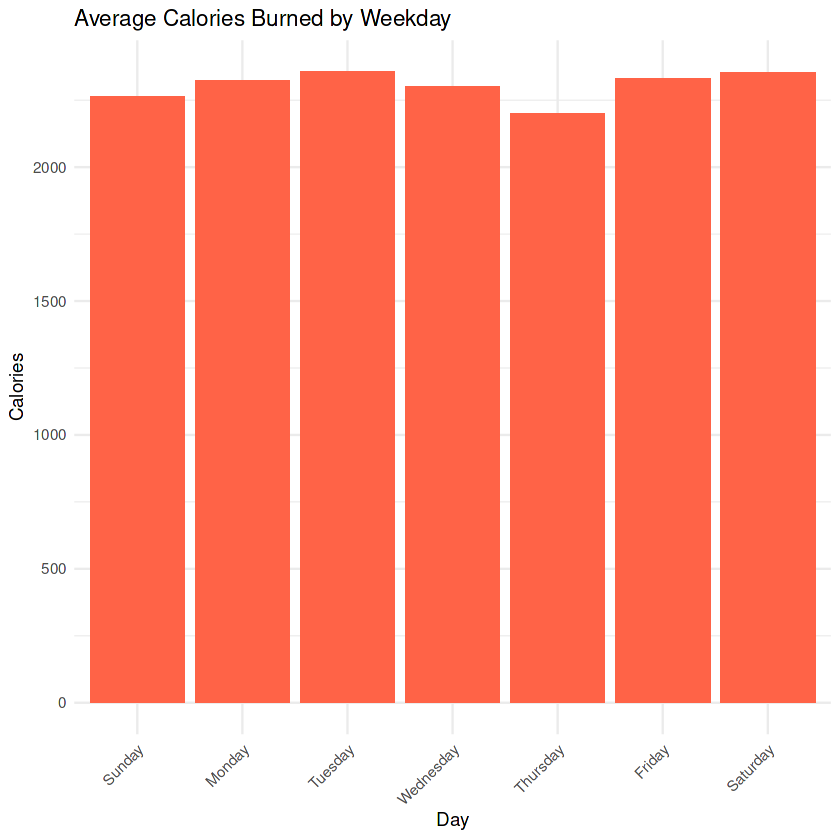

In [14]:
ggplot(calories_day, aes(x = weekday, y = avg_calories)) +
  geom_col(fill = "tomato") +
  labs(title = "Average Calories Burned by Weekday",
       x = "Day", y = "Calories") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Como já esperado o gráfico segue a mesma têndencia do gráfico anterior onde comparamos a média de passos; + passos + calórias gastas obviamente.

Agora e se focarmos apenas nas atividades intensas? O intuito é tentar descobrir a relação das atividades intensas com o gasto calórico e como podemos otimizar essas atividades.
Para comprovar esssa relação realizei um gráfico de dispersão que vai mostrar o comportamendo das calorias ao longo da atividade intensa.

`geom_smooth()` using formula = 'y ~ x'


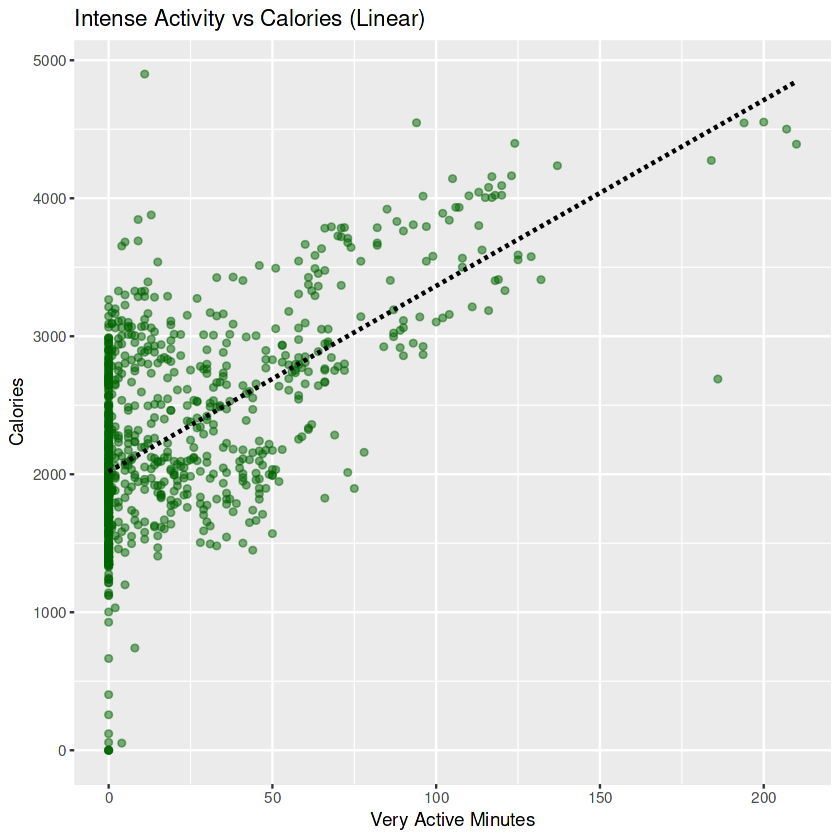

In [15]:
ggplot(activity, aes(x = very_active_minutes, y = calories)) +
  geom_point(alpha = 0.5, color = "darkgreen") +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  labs(title = "Intense Activity vs Calories (Linear)",
       x = "Very Active Minutes", y = "Calories")

E o gráfico mostrou uma correlação positiva entre as duas variavéis, onde comprovamos que quanto mais tempo de atividade intensa maior o gasto calórico.

Que o gasto calórico aumenta com a atividade nós já sabemos, agora como será que podemos otimizar essa atividade **E** o nosso tempo; descobrindo a faixa de tempo de treino mais efetiva em minutos? 


In [16]:
activity_bins <- activity %>%
  mutate(minute_bin = cut(very_active_minutes,
                          breaks = seq(0, max(very_active_minutes, na.rm = TRUE) + 10, by = 10),
                          include.lowest = TRUE, right = FALSE)) %>%
  group_by(minute_bin) %>%
  summarise(
    avg_calories = mean(calories, na.rm = TRUE),
    avg_minutes = mean(very_active_minutes),
    calories_per_minute = avg_calories / avg_minutes,
    .groups = 'drop'
  ) %>%
  filter(!is.na(calories_per_minute))

Agrupei os dados em faixas de 10 minutos cada, com o objetivo de descobrir a quantidade de calorias gastas por minutos intensos.

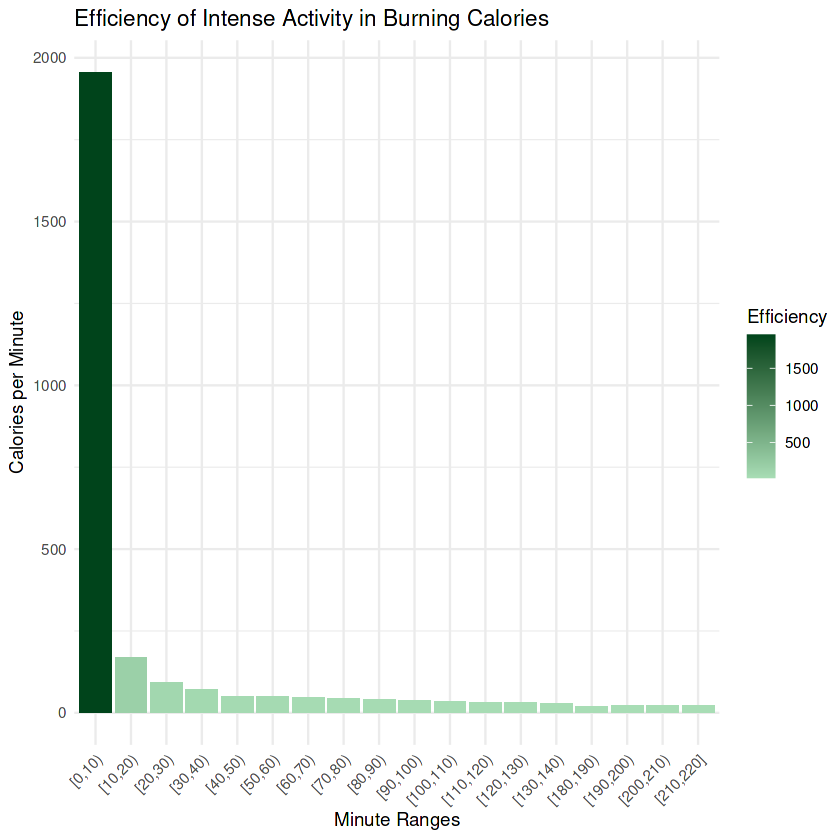

In [17]:
ggplot(activity_bins, aes(x = minute_bin, y = calories_per_minute, fill = calories_per_minute)) +
  geom_bar(stat = "identity") +
  scale_fill_gradient(low = "#a8ddb5", high = "#00441b") +
  labs(title = "Efficiency of Intense Activity in Burning Calories",
       x = "Minute Ranges", y = "Calories per Minute", fill = "Efficiency") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Como resultado temos essa visualização, que mostra uma GRANDE queima de calorias nos 10 primeiros minutos de atividade intensa e que continua significativa até a faixa dos 30 minutos. Isso nos conta que podemos ter uma eficiente perca de calorias investindo apenas 30 minutos do nosso dia, ideal para usuários que não tem muito tempo para se exercitar e querer obter bons resultados.

Após analisar os dados FitBit Fitness cheguei aos seguintes insights que podem nos ajudar a responder a business task e serem incorporados ao app e produtos da Bellabeat e em campanhas de marketing futuras:

- Notificações: Como vimos na análise nós temos dias com menos atividades do que outros, notificações de encorajamento ou lembrete para realizar atividades, principalmente nesses dias pode ser uma boa maneira de engajar o usuário.
- Modo "Coach": Para usuários mais "hardcores" que desejam queimar mais calorias e realizar atividades mais intensas. Como vimos no nosso estudo existe uma perca acentuada de calorias na primeira meia hora de exercício intenso ; então além das notificações os usuários que aderirem ao modo o app poderia sugerir algumas ideias de treinos rápidos e intensos (dentro da marca de meia hora).
- Sistema de progressão/recompensas: Como sabemos extensivamente, a sensação de progressão e recompensa na experiencia do usuário incentiva a participação continua e engajamento então a criação de um sistema de progressão e recompensas, onde podemos ter features como streak de dias ativos, badges conforme atinge numero de passos, calorias queimadas e etc.

